In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('dark')
from scipy.cluster.hierarchy import dendrogram ,linkage
from sklearn.cluster import AgglomerativeClustering

In [58]:
#Display the first 10 rows of the dataset
data=pd.read_csv(r"S:/2nd year/2nd semester/data mining project/data set/heart_attack_prediction_dataset.csv")
data.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146839,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [59]:
print(data.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [61]:
#when i check i found that data is clean totaly free of null values
null_values = data.isnull().sum()
print("Null values:")
print(null_values)
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)

Null values:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

Duplicate r

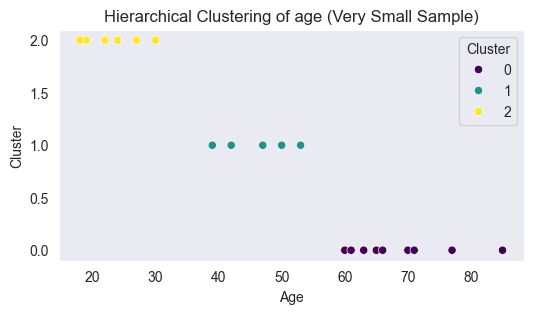

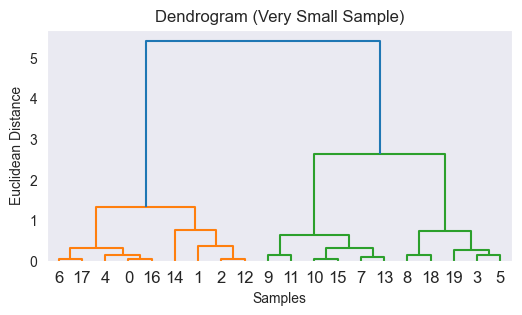

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Selecting an even smaller sample of the 'age' column for clustering
sample_size = 20  # Define a smaller sample size
X_very_small_sample = data[['Age']].sample(n=sample_size, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_very_small_sample_scaled = scaler.fit_transform(X_very_small_sample)

# Perform hierarchical clustering
# Here, we'll use AgglomerativeClustering with 3 clusters as an example
cluster = AgglomerativeClustering(n_clusters=3)
clusters_very_small_sample = cluster.fit_predict(X_very_small_sample_scaled)

# Add the cluster labels to the very small sample dataframe
X_very_small_sample['Cluster'] = clusters_very_small_sample

# Visualize the clusters
plt.figure(figsize=(6, 3))
sns.scatterplot(data=X_very_small_sample, x='Age', y='Cluster', palette='viridis', hue='Cluster')
plt.title('Hierarchical Clustering of age (Very Small Sample)')
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()

# Plot the dendrogram for the very small sample
plt.figure(figsize=(6, 3))
dendrogram(linkage(X_very_small_sample_scaled, method='ward'))
plt.title('Dendrogram (Very Small Sample)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


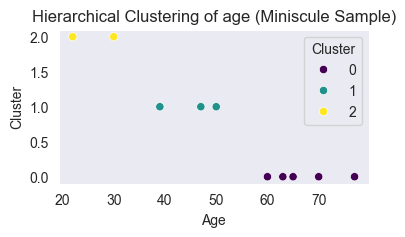

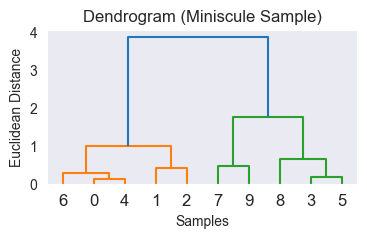

In [63]:
# Selecting a very small sample of the 'Age' column for clustering
sample_size = 10  # Define a very small sample size
X_miniscule_sample = data[['Age']].sample(n=sample_size, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_miniscule_sample_scaled = scaler.fit_transform(X_miniscule_sample)

# Perform hierarchical clustering
# Here, we'll use AgglomerativeClustering with 3 clusters as an example
cluster = AgglomerativeClustering(n_clusters=3)
clusters_miniscule_sample = cluster.fit_predict(X_miniscule_sample_scaled)

# Add the cluster labels to the miniscule sample dataframe
X_miniscule_sample['Cluster'] = clusters_miniscule_sample

# Visualize the clusters
plt.figure(figsize=(4, 2))
sns.scatterplot(data=X_miniscule_sample, x='Age', y='Cluster', palette='viridis', hue='Cluster')
plt.title('Hierarchical Clustering of age (Miniscule Sample)')
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()

# Plot the dendrogram for the miniscule sample
plt.figure(figsize=(4, 2))
dendrogram(linkage(X_miniscule_sample_scaled, method='ward'))
plt.title('Dendrogram (Miniscule Sample)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

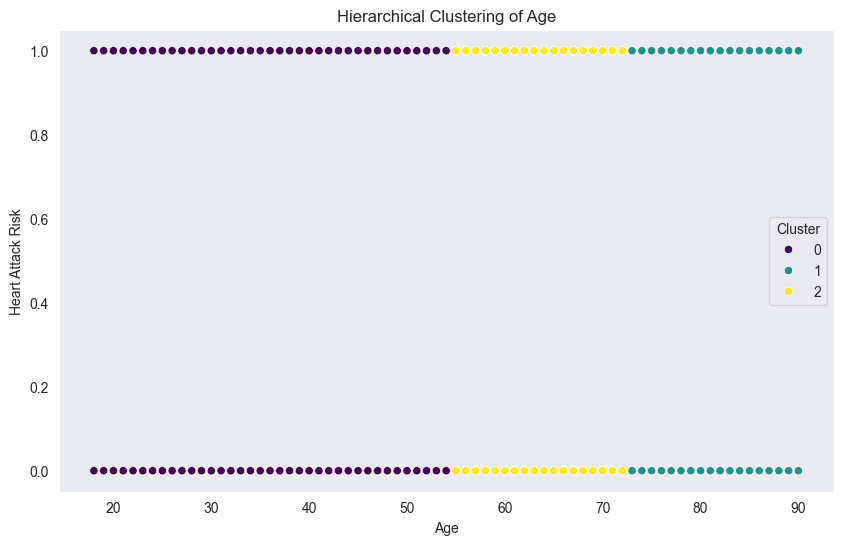

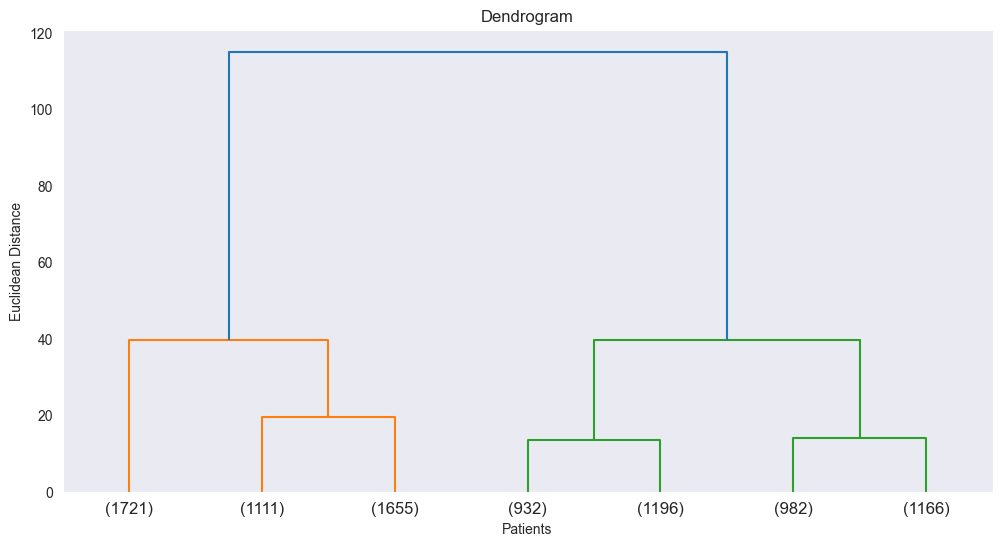

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Selecting the 'Age' column for clustering
X = data[['Age']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3)
clusters = cluster.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Heart Attack Risk', hue='Cluster', palette='viridis')
plt.title('Hierarchical Clustering of Age')
plt.xlabel('Age')
plt.ylabel('Heart Attack Risk')
plt.legend(title='Cluster')
plt.show()

# Perform hierarchical clustering with single linkage
cluster = AgglomerativeClustering(n_clusters=3, linkage='single')
clusters = cluster.fit_predict(X_scaled)

# Plot the dendrogram with truncation
plt.figure(figsize=(12, 6))
dendrogram(linkage(X_scaled, method='ward'), truncate_mode='lastp', p=7)
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean Distance')
plt.show()


Heart Attack Risk: 5.000000000000002
Fuzzy Rules:
IF age[young] THEN heart_attack_risk[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF age[middle_aged] THEN heart_attack_risk[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF age[elderly] THEN heart_attack_risk[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Heart Attack Risk: 5.000000000000002


c:\Users\zozel\vs code\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


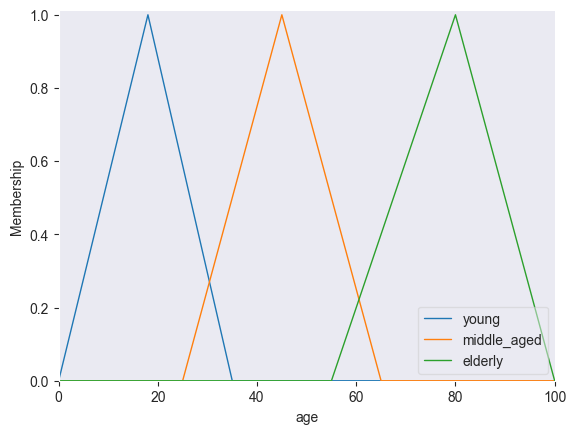

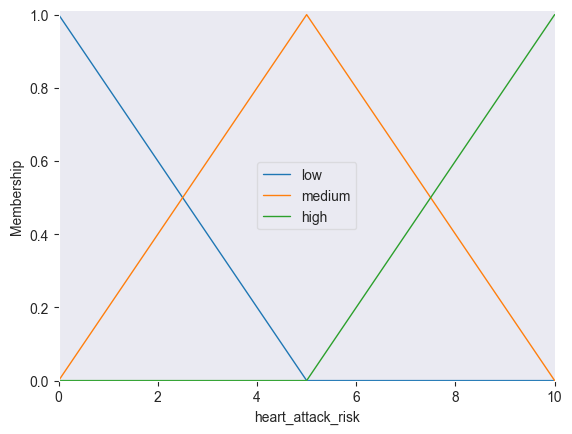

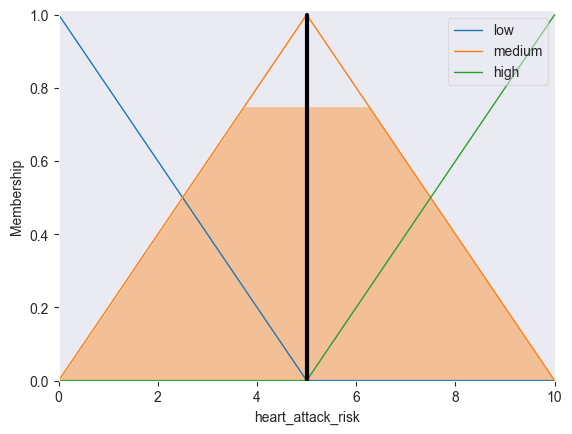

In [65]:
#apply fuzzy on it
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
heart_attack_risk = ctrl.Consequent(np.arange(0, 11, 1), 'heart_attack_risk')

# Define fuzzy sets for age
age['young'] = fuzz.trimf(age.universe, [0, 18, 35])
age['middle_aged'] = fuzz.trimf(age.universe, [25, 45, 65])
age['elderly'] = fuzz.trimf(age.universe, [55, 80, 100])

# Define membership functions for heart attack risk
heart_attack_risk['low'] = fuzz.trimf(heart_attack_risk.universe, [0, 0, 5])
heart_attack_risk['medium'] = fuzz.trimf(heart_attack_risk.universe, [0, 5, 10])
heart_attack_risk['high'] = fuzz.trimf(heart_attack_risk.universe, [5, 10, 10])

# Define fuzzy rules
rule1 = ctrl.Rule(age['young'], heart_attack_risk['low'])
rule2 = ctrl.Rule(age['middle_aged'], heart_attack_risk['medium'])
rule3 = ctrl.Rule(age['elderly'], heart_attack_risk['high'])

# Create control system
heart_attack_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
heart_attack_sim = ctrl.ControlSystemSimulation(heart_attack_ctrl)

# Calculate fuzzy output for age
heart_attack_sim.input['age'] = 40
heart_attack_sim.compute()
print("Heart Attack Risk:", heart_attack_sim.output['heart_attack_risk'])
# Display the membership functions for age and heart attack risk
age.view()
heart_attack_risk.view()

# Print the fuzzy rules
print("Fuzzy Rules:")
for rule in heart_attack_ctrl.rules:
    print(rule)

# Show the membership of the output function
heart_attack_risk.view(sim=heart_attack_sim)

# Print the computed output
print("Heart Attack Risk:", heart_attack_sim.output['heart_attack_risk'])

# Show the plots
plt.show()